In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

measurements = {
    "acc": pd.read_json('accelerometer_details.json'),
    "gyro": pd.read_json('gyroscope_details.json')
}

# Sort by timestamp while preserving measurementId
for name in ["acc", "gyro"]:
    measurements[name].sort_values(by=['measurementId', 'timestampUtc'], ascending=[True, True], inplace=True)
    measurements[name] = measurements[name].reset_index(drop=True) # update index




In [54]:
# Time difference between measurements
for name in ["acc", "gyro"]:
    measurements[name]['diff'] = measurements[name].groupby(['measurementId'])['timestampUtc'].diff()

difference_info_df = pd.DataFrame()
for name in ["acc", "gyro"]:
    difference_info_df[f"{name}_max"] = measurements[name].groupby('measurementId')["diff"].max()
    difference_info_df[f"{name}_min"] = measurements[name].groupby('measurementId')["diff"].min()

# This is not supported by pandas:
# difference_info_df["average"] = measurements[name].groupby('measurementId')["diff"].mean()
# So instead global average must be enough
print("Time difference between measurements")
print(difference_info_df)
for name in ["acc", "gyro"]:
    print(f"{name} average: {measurements[name]['diff'].mean()}")
    print(f"{name} max: {measurements[name]['diff'].max()}")
    print(f"{name} min: {measurements[name]['diff'].min()}")



Time difference between measurements
                             acc_max                acc_min  \
measurementId                                                 
1             0 days 00:00:00.152000 0 days 00:00:00.018000   
3             0 days 00:00:00.139000 0 days 00:00:00.005000   
4             0 days 00:00:00.111000 0 days 00:00:00.075000   
5             0 days 00:00:00.111000 0 days 00:00:00.075000   
6             0 days 00:00:00.111000 0 days 00:00:00.075000   
7             0 days 00:00:00.111000 0 days 00:00:00.075000   
8             0 days 00:00:00.111000 0 days 00:00:00.075000   
9             0 days 00:00:00.185000 0 days 00:00:00.009000   
11            0 days 00:00:00.149000 0 days 00:00:00.009000   
13            0 days 00:00:00.181000 0 days 00:00:00.018000   
14            0 days 00:00:00.135000 0 days 00:00:00.043000   
15            0 days 00:00:00.136000 0 days 00:00:00.026000   
16            0 days 00:00:00.136000 0 days 00:00:00.008000   
18            0 da

In [ ]:
for name in ["acc", "gyro"]:
    print(f"{name} histogram:")
    measurements[name]['diff'].dt.microseconds.hist()
    plt.show()


In [53]:
resample_time_interval = '25L' # 50L = 50 miliseconds

# Base (example on measurementId 11)
df_filtered = measurements["acc"][measurements["acc"]['measurementId'] == 11]

# resampling
df_resampled = df_filtered.set_index('timestampUtc').resample(resample_time_interval).mean()

# interpolation
df_interpolated = df_resampled.interpolate('linear')


x base


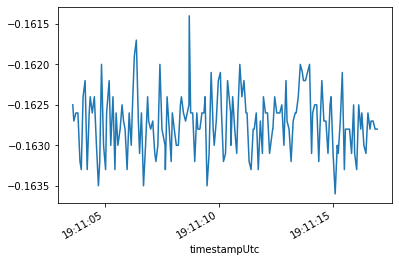

x resampled


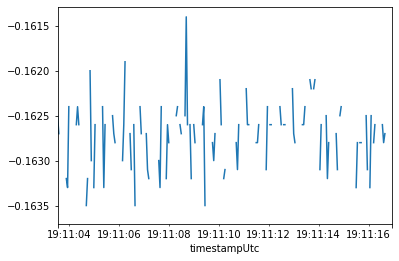

x interpolated


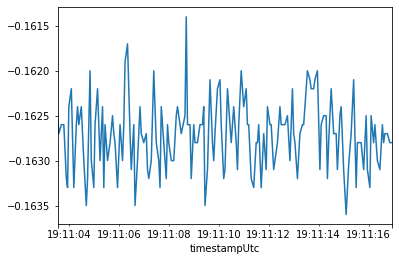

y base


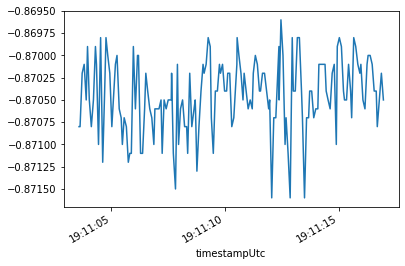

y resampled


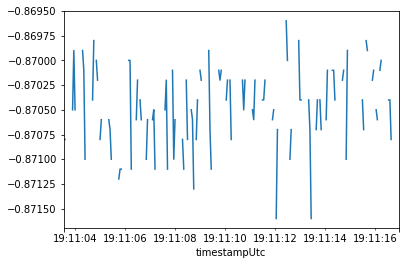

y interpolated


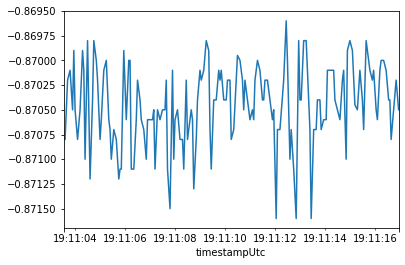

z base


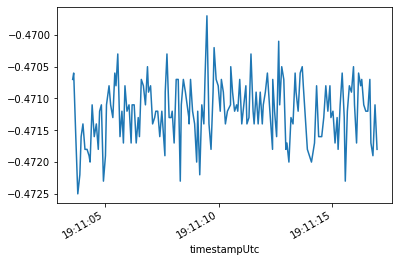

z resampled


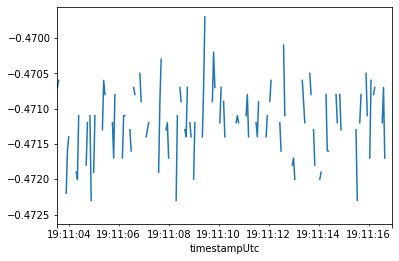

z interpolated


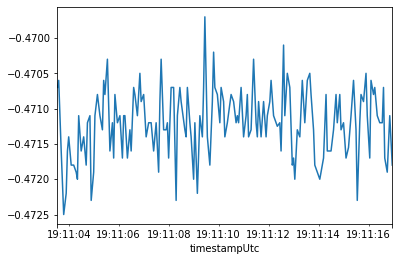

In [48]:
# separate
for direction in ['x', 'y', 'z']:
    print(f"{direction} base")
    df_filtered.set_index('timestampUtc')[direction].plot()
    plt.show()
    print(f"{direction} resampled")
    df_resampled[direction].plot()
    plt.show()
    print(f"{direction} interpolated")
    df_interpolated[direction].plot()
    plt.show()

x base and interpolated


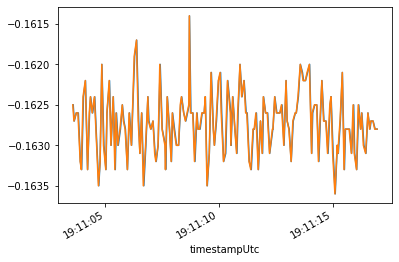

y base and interpolated


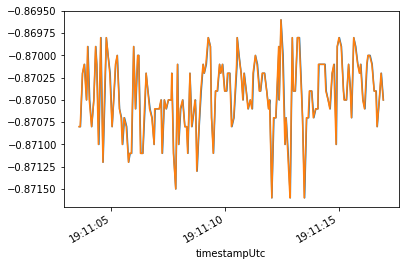

z base and interpolated


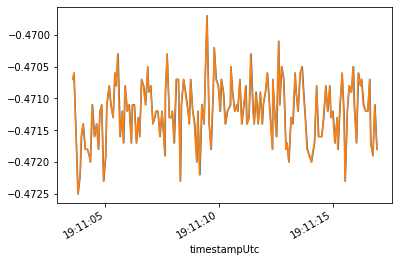

In [51]:
# combined
for direction in ['x', 'y', 'z']:
    print(f"{direction} base and interpolated")
    df_filtered.set_index('timestampUtc')[direction].plot()
    #df_resampled[direction].plot()
    df_interpolated[direction].plot()
    plt.show()

In [ ]:
# df_filtered = measurements["acc"][measurements["acc"]['measurementId'] == 11]
# microseconds_interval = 50000

# min_time = df_filtered["timestampUtc"].min()
# max_time = df_filtered["timestampUtc"].max()
# print(min_time)
# print(max_time)
# print(timedelta(microseconds=microseconds_interval))
# print(min_time.ceil(freq=f"{microseconds_interval}L"))

# current_time = min_time
# interpolated_time=[min_time]
